In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
import seaborn as sns
#import scikit_posthocs as sp
import scipy.stats as ss
from scipy.ndimage import percentile_filter

In [2]:
plt.style.use('ggplot')

In [3]:
plt.rcParams["legend.fontsize"] = 14
plt.rcParams["legend.title_fontsize"] = 16

In [4]:
def box(d, y, title, name, log=False):
    regions = d['region'].unique()[1:]
    fig, ax = plt.subplots(figsize=(15,8))
    if log:
        plt.yscale('log')
    sns.boxplot(x="region", y=y,
                data=d, palette="Set3",
                showmeans=True,
                meanprops={"marker":"D",
                           "markerfacecolor":"gold", 
                           "markeredgecolor":"black",
                           "markersize":"12"},
                order=regions)
    ax.set_xticklabels(regions, fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('')
    plt.ylabel('C('+title+r'), items/km$^{2}$', fontsize=16)
    plt.show()

#     plt.savefig(name, dpi=300)

In [5]:
def plot_ttest(p, title, name):
    fig, ax = plt.subplots()
    sp.sign_plot(p, ax=ax, linewidth=.5)
    ax.set_title(title)
    plt.show()
#     plt.savefig(name, bbox_inches='tight', dpi=100)

In [6]:
df = pd.read_excel('FML_tracks_Kara_2021.xls')

In [7]:
df['region'].unique()[1:]

array(['Atlantic', 'Plume', 'Ice', 'North', 'Murmansk'], dtype=object)

In [8]:
dfw = df[~df['region'].isin(["Ice", "Murmansk", "Sev Dvina"])].reset_index(drop=True)

In [9]:
dfc = df[~df['region'].isin(["Atlantic", "North", "Plume", "Ice"])].reset_index(drop=True)

In [10]:
dfi = df[~df['region'].isin(["Atlantic", "North", "Plume", "Murmansk", "Sev Dvina"])].reset_index(drop=True)

In [10]:
df[df['h_plastic'] > 100] #.to_csv('plastic100')

,Unnamed: 0,total,nature,human,h_nonplastic,h_plastic,lon_mean,lat_mean,datetime_start,datetime_stop,...,square,integral_speed,filename,lon_start,lat_start,lon_end,lat_end,plastic,nonplastic,region
19,19,13023.874391,12634.573798,176.954815,0.000000,176.954815,58.072159,70.399703,2021-08-12 17:28:03,2021-08-12 18:01:45,...,0.028256,1.746773,['Mark Zakharzhevsky_MIPT_2021_08_12_17_27'],58.052200,70.381989,58.086349,70.411629,5,0,Atlantic
36,36,196.720980,49.180245,147.540735,0.000000,147.540735,69.462484,74.704860,2021-08-14 10:17:35,2021-08-14 10:42:18,...,0.020333,1.713871,['NowikovM_IO_2021_08_14_10_17'],69.409676,74.703148,69.495750,74.706108,3,0,Plume
39,39,293.450096,73.362524,220.087572,0.000000,220.087572,69.561759,74.705669,2021-08-14 13:13:35,2021-08-14 13:30:07,...,0.013631,1.717608,['NowikovM_IO_2021_08_14_13_13'],69.589645,74.706604,69.531914,74.704674,3,0,Plume
45,45,914.732787,636.335852,159.083963,0.000000,159.083963,73.050938,73.068384,2021-08-15 16:13:37,2021-08-15 16:40:03,...,0.025144,1.981711,['Anikin Nikita_MIPT_2021_08_15_16_13'],73.067657,73.080086,73.029465,73.054047,4,2,Plume
63,63,163.352062,30.628512,132.723550,0.000000,132.723550,80.941016,78.997807,2021-08-20 10:18:11,2021-08-20 11:14:40,...,0.195896,7.225432,['Daria Osipova_MSU_2021_08_20_10_18'],80.969139,78.886482,80.944511,79.106377,26,0,North
65,65,407.141317,189.029897,218.111420,0.000000,218.111420,80.480726,79.411024,2021-08-20 13:26:19,2021-08-20 14:09:41,...,0.068772,3.303814,['polinka lepikhina_msu_2021_08_20_13_26'],80.586403,79.380432,80.363365,79.446144,15,0,North
66,66,226.197258,0.000000,226.197258,0.000000,226.197258,80.421920,79.482473,2021-08-20 15:04:13,2021-08-20 15:37:48,...,0.039788,2.468256,['dmitry belov_sio_2021_08_20_15_04'],80.337372,79.463799,80.490555,79.498810,9,0,North
138,138,411.825147,229.855896,129.293941,4.788664,124.505277,33.594160,69.504306,2021-08-31 17:31:45,2021-08-31 18:31:12,...,0.208826,7.318001,['Elizabeth Lipukhin_IO_2021_08_31_17_31'],33.596352,69.392944,33.590183,69.628098,26,4,Murmansk


In [265]:
df[df['Unnamed: 0'] == 66]

,Unnamed: 0,total,nature,human,h_nonplastic,h_plastic,lon_mean,lat_mean,datetime_start,datetime_stop,...,square,integral_speed,filename,lon_start,lat_start,lon_end,lat_end,plastic,nonplastic,region
66,66,226.197258,0.0,226.197258,0.0,226.197258,80.42192,79.482473,2021-08-20 15:04:13,2021-08-20 15:37:48,...,0.039788,2.468256,['dmitry belov_sio_2021_08_20_15_04'],80.337372,79.463799,80.490555,79.49881,9,0,North


In [266]:
chem['category'][chem['markers'] == 66].dropna()

9193         Synthetic rope
9199    Other plastic items
9203     Polystyrene pieces
9205                 Sheets
9207                 Sheets
9214     Polystyrene pieces
9215     Polystyrene pieces
9221     Polystyrene pieces
9227     Polystyrene pieces
9230                 Sheets
9232     Polystyrene pieces
9237     Polystyrene pieces
9244                 Sheets
9251     Polystyrene pieces
9260                 Sheets
9261                 Sheets
9268                 Sheets
Name: category, dtype: object

In [267]:
p95 = df.describe(percentiles=[0.95]).loc['95%']
# q95 = df.groupby('region').quantile(0.95)

In [268]:
df.groupby('region').count()

,Unnamed: 0,total,nature,human,h_nonplastic,h_plastic,lon_mean,lat_mean,datetime_start,datetime_stop,...,width,square,integral_speed,filename,lon_start,lat_start,lon_end,lat_end,plastic,nonplastic
region,,,,,,,,,,,,,,,,,,,,,
Atlantic,46,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46
Ice,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
Murmansk,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
North,56,56,56,56,56,56,56,56,56,56,...,56,56,56,56,56,56,56,56,56,56
Plume,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
Sev Dvina,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7


In [19]:
print('h_plastic:', ss.levene(*df.groupby('region')['h_plastic'].apply(list).values, center='median'))
print('nature:', ss.levene(*df.groupby('region')['nature'].apply(list).values, center='median'))
print('total:', ss.levene(*df.groupby('region')['total'].apply(list).values, center='median'))

h_plastic: LeveneResult(statistic=1.7181642505806622, pvalue=0.13454689024525204)
nature: LeveneResult(statistic=1.7859242035836336, pvalue=0.11981438281921176)
total: LeveneResult(statistic=2.081814267918356, pvalue=0.07143081889783201)


In [269]:
sp.posthoc_ttest(dfw, val_col='h_plastic',
                 group_col='region', equal_var=True, p_adjust='fdr_bh')

,Atlantic,Plume,North
Atlantic,1.000000,0.191004,0.191004
Plume,0.191004,1.000000,0.657510
North,0.191004,0.657510,1.000000


In [271]:
p = sp.posthoc_ttest(dfw, val_col='h_nonplastic',
                 group_col='region', equal_var=False, p_adjust='fdr_bh')

In [272]:
p = sp.posthoc_ttest(dfw, val_col='total',
                 group_col='region', equal_var=False, p_adjust='fdr_bh')

In [70]:
sp.posthoc_conover?

Signature:
sp.posthoc_conover(
    a,
    val_col=None,
    group_col=None,
    p_adjust=None,
    sort=True,
)
Docstring:
Post hoc pairwise test for multiple comparisons of mean rank sums
(Conover's test). May be used after Kruskal-Wallis one-way analysis of
variance by ranks to do pairwise comparisons [1]_.

Parameters
----------
a : array_like or pandas DataFrame object
    An array, any object exposing the array interface or a pandas DataFrame.
    Array must be two-dimensional. Second dimension may vary,
    i.e. groups may have different lengths.

val_col : str, optional
    Name of a DataFrame column that contains dependent variable values (test
    or response variable). Values should have a non-nominal scale. Must be
    specified if `a` is a pandas DataFrame object.

group_col : str, optional
    Name of a DataFrame column that contains independent variable values
    (grouping or predictor variable). Values should have a nominal scale
    (categorical). Must be specified if 

In [273]:
sp.posthoc_conover(dfw, val_col='h_plastic',
                   group_col='region', p_adjust='holm')

,Atlantic,North,Plume
Atlantic,1.000000,0.865748,0.865748
North,0.865748,1.000000,0.865748
Plume,0.865748,0.865748,1.000000


In [274]:
sp.posthoc_conover(dfw, val_col='human',
                   group_col='region', p_adjust='holm')

,Atlantic,North,Plume
Atlantic,1.000000,0.928856,0.928856
North,0.928856,1.000000,0.653776
Plume,0.928856,0.653776,1.000000


In [275]:
sp.posthoc_conover(dfw, val_col='total',
                   group_col='region', p_adjust='holm')

,Atlantic,North,Plume
Atlantic,1.000000,0.000016,0.001459
North,0.000016,1.000000,0.994153
Plume,0.001459,0.994153,1.000000


In [62]:
# try to log -> normal distribution -> fail
# df['log_nonplastic'] = np.log1p(df['h_nonplastic'])
# df['log_plastic'] = np.log1p(df['h_plastic'])

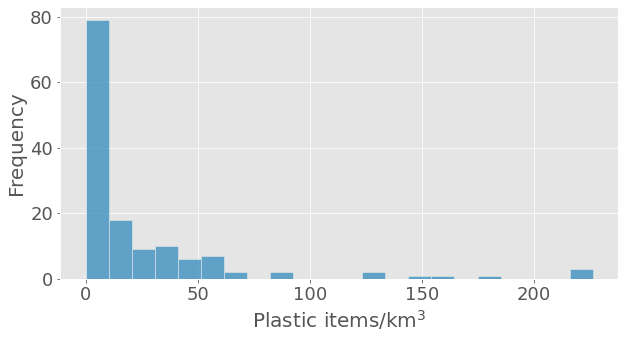

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(df, x='h_plastic',)
plt.xlabel('Plastic items/km$^3$', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.savefig('Plastic_hist.png', bbox_inches='tight', dpi=300)

<AxesSubplot:xlabel='human', ylabel='Count'>

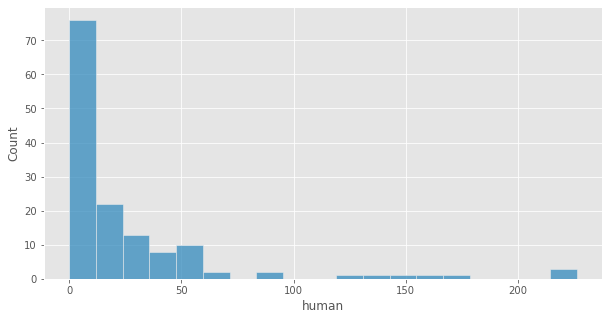

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(df, x='human',)

In [24]:
df.groupby('region').mean()

,Unnamed: 0,total,nature,human,h_nonplastic,h_plastic,lon_mean,lat_mean,dtime,length,width,square,integral_speed,lon_start,lat_start,lon_end,lat_end,plastic,nonplastic
region,,,,,,,,,,,,,,,,,,,
Atlantic,67.391304,992.371819,866.631163,19.507429,2.050726,17.456703,48.947418,71.331900,0.032182,18.281989,0.008,0.146256,6.816084,48.940335,71.336076,48.988284,71.338223,1.804348,0.347826
Ice,54.500000,113.335268,108.246234,5.089034,0.000000,5.089034,80.845550,74.095328,0.026583,11.188693,0.008,0.089510,3.928673,80.815728,74.112487,80.872341,74.080144,0.125000,0.000000
Murmansk,138.000000,279.253211,195.277634,39.212173,0.957733,38.254440,33.489647,69.544322,0.041308,23.085094,0.008,0.184681,6.472309,33.471251,69.452419,33.484579,69.641167,7.600000,2.800000
North,86.500000,167.834683,134.295626,30.735496,1.139881,29.595616,71.854325,80.010393,0.039150,19.722624,0.008,0.157781,5.728936,71.934012,79.958006,71.796516,80.002679,2.803571,0.196429
Plume,41.000000,145.018218,102.090948,36.174847,0.472794,35.702053,71.578328,73.937939,0.036061,10.166292,0.008,0.081330,3.107258,71.503756,73.937813,71.663081,73.953753,0.947368,0.157895
Sev Dvina,3.000000,81.158108,26.385967,0.000000,0.000000,0.000000,39.958932,65.386524,0.030309,18.936434,0.008,0.151491,6.981021,39.926492,65.315477,39.988066,65.461478,0.000000,0.000000


<AxesSubplot:xlabel='h_plastic', ylabel='Count'>

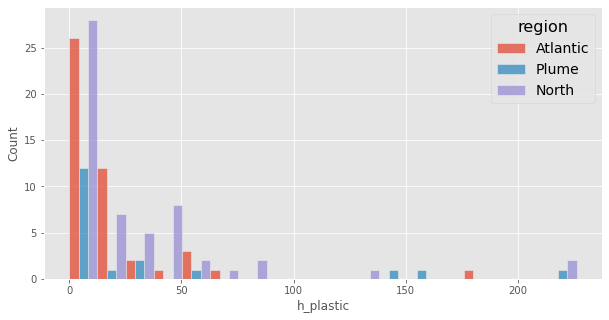

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(dfw, x='h_plastic', hue='region', multiple="dodge")

<AxesSubplot:xlabel='h_plastic', ylabel='Count'>

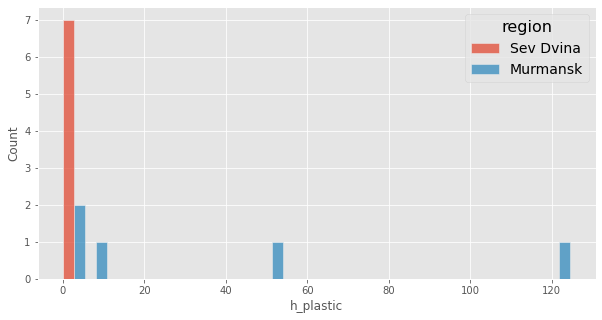

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(dfc, x='h_plastic', hue='region', multiple="dodge")

<AxesSubplot:xlabel='h_plastic', ylabel='Count'>

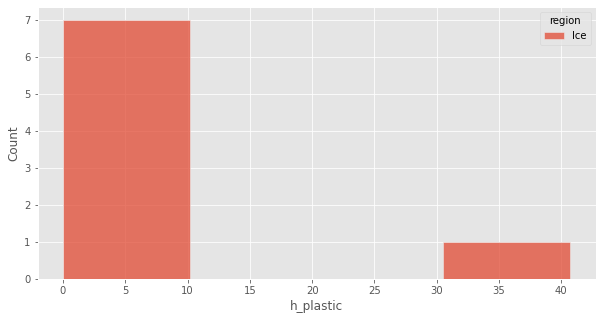

In [281]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(dfi, x='h_plastic', hue='region', multiple="dodge")

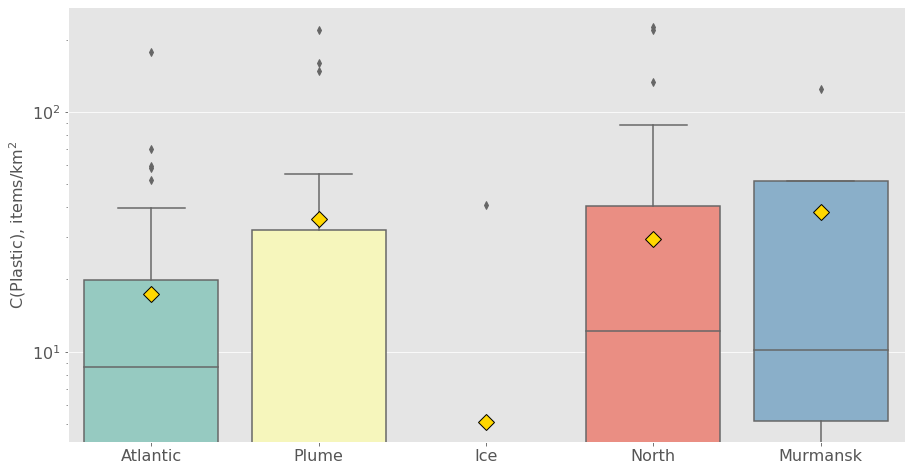

In [22]:
box(df, 'h_plastic', 'Plastic', 'plastic_box', log=True)

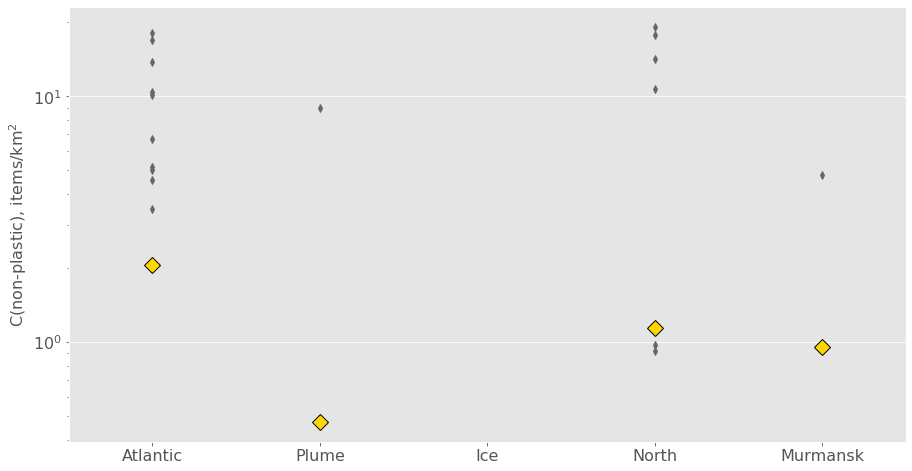

In [11]:
box(df, 'h_nonplastic', 'non-plastic', 'human_box', log=True)

In [31]:
chem = pd.read_csv('FML_all.csv')

In [32]:
all_types = ['Balls', 'Beams / Dunnage', 'Carpet & Furnishing', 'Clothing',
        'Litter patch >20 items', 'Newspapers & magazines', 'Other metal',
        'Other paper', 'Other textiles', 'Rope / string and nets', 'Wood boards', 'Cans',
        'Other plastic items', 'Synthetic rope', 'Bag', 'Plastic pieces', 'Foam']
group_types = ['Boards', 'Textiles', 'Paper', 'Other non-plastic litter',
               'Litter patch >20 items',
               'Other plastic items', 'Synthetic ropes', 'Plastic Bags', 'Plastic pieces']

In [33]:
human = chem[chem['category'].isin(all_types)]

In [34]:
human['category'][human['category'].isin(['Beams / Dunnage', 'Carpet & Furnishing', 'Wood boards',])] = 'Boards'
human['category'][human['category'].isin(['Clothing', 'Other textiles', 'Wood boards',])] = 'Textiles'
human['category'][human['category'].isin(['Newspapers & magazines', 'Other paper'])] = 'Paper'
human['category'][human['category'].isin(['Balls', 'Rope / string and nets',
                                          'Other metal', 'Cans'])] = 'Other non-plastic litter'
human['category'][human['category'] == 'Foam'] = 'Other plastic items'

/home/matweyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/matweyn/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8861: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/home/matweyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [35]:
human['category'].unique()

array(['Other plastic items', 'Other non-plastic litter',
       'Synthetic rope', 'Bag', 'Plastic pieces',
       'Litter patch >20 items', 'Boards', 'Paper', 'Textiles'],
      dtype=object)

In [15]:
df.groupby('region').h_plastic.describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Atlantic,46.0,17.456703,29.572536,0.0,0.000000,8.652173,19.970237,176.954815
Ice,8.0,5.089034,14.393963,0.0,0.000000,0.000000,0.000000,40.712276
Murmansk,5.0,38.254440,52.353782,0.0,5.123804,10.170523,51.472594,124.505277
North,56.0,29.595616,46.334230,0.0,0.000000,12.199649,40.341203,226.197258
Plume,19.0,35.702053,65.310881,0.0,0.000000,0.000000,32.071313,220.087572
Sev Dvina,7.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [37]:
cmap = cm.get_cmap('Spectral')(np.linspace(0, 1, len(group_types)))

In [356]:
cmap

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.88535179, 0.31903114, 0.29042676, 1.        ],
       [0.98731257, 0.6473664 , 0.36424452, 1.        ],
       [0.99715494, 0.91180315, 0.60107651, 1.        ],
       [0.92887351, 0.9715494 , 0.63806228, 1.        ],
       [0.63344867, 0.85213379, 0.64367551, 1.        ],
       [0.28004614, 0.62698962, 0.70242215, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

In [345]:
legend.properties?

Signature: legend.properties()
Docstring: Return a dictionary of all the properties of the artist.
File:      ~/anaconda3/envs/Work/lib/python3.9/site-packages/matplotlib/artist.py
Type:      method


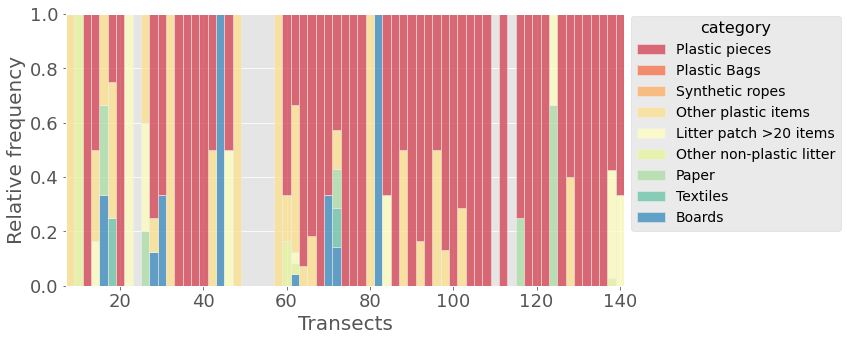

In [39]:
fig, ax = plt.subplots(figsize=(10,5))
hist = sns.histplot(human, x='markers', hue='category', multiple="fill",
                    hue_order=reversed(group_types),
                    binwidth=2, palette='Spectral')
legend = ax.get_legend()
legend.set_bbox_to_anchor((1,1.02))
plt.xlabel('Transects', fontsize=20)
plt.ylabel('Relative frequency', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.savefig('Shpon.png', dpi=300, bbox_inches='tight')

In [225]:
sns.palettes.SEABORN_PALETTES

TypeError: 'dict' object is not callable

In [183]:
legend?

Type:           Legend
String form:    Legend
File:           ~/anaconda3/envs/Work/lib/python3.9/site-packages/matplotlib/legend.py
Docstring:      Place a legend on the axes at location loc.
Init docstring:
Parameters
----------
parent : `~matplotlib.axes.Axes` or `.Figure`
    The artist that contains the legend.

handles : list of `.Artist`
    A list of Artists (lines, patches) to be added to the legend.

labels : list of str
    A list of labels to show next to the artists. The length of handles
    and labels should be the same. If they are not, they are truncated
    to the smaller of both lengths.

Other Parameters
----------------

loc : str or pair of floats, default: :rc:`legend.loc` ('best' for axes, 'upper right' for figures)
    The location of the legend.

    The strings
    ``'upper left', 'upper right', 'lower left', 'lower right'``
    place the legend at the corresponding corner of the axes/figure.

    The strings
    ``'upper center', 'lower center', 'center left